# **Problem - 1: Getting Started with Data Exploration**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# 1. Load the dataset and display the first 10 rows.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHR-2024-5CS037.csv')
print("First 10 rows of the dataset:")
print(df.head(10))

# 2. Identify the number of rows and columns in the dataset.
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

# 3. List all the columns and their data types.
print("Columns and their data types:")
print(df.dtypes)

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [5]:
# Basic Statistics
# 1. Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print("The Basic Statistics")
print(f"Mean Score: {mean_score}, Median Score: {median_score}, Standard Deviation: {std_score}")

# 2. Identify the country with the highest and lowest happiness scores.
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"Country with highest Score: {max_score_country}")
print(f"Country with lowest Score: {min_score_country}")

The Basic Statistics
Mean Score: 5.52758041958042, Median Score: 5.785, Standard Deviation: 1.1707165099442995
Country with highest Score: Finland
Country with lowest Score: Afghanistan


In [6]:
# Missing Values
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [7]:
# Filtering and Sorting
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]
print("Countries with Score > 7.5:")
print(filtered_df)

# 2. For the filtered dataset - Sort the dataset by Log GDP per capita in descending order and display the top 10 rows.
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries with Score > 7.5 sorted by Log GDP per capita:")
print(sorted_df.head(10))


Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
Top 10 countries with Score > 7.5 sorted by Log GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881   

In [8]:
# Adding New Columns
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score.
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("Dataset with Happiness Category column:")
print(df[['Country name', 'score', 'Happiness Category']])

Dataset with Happiness Category column:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


<ipython-input-9-d5e949e352ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')


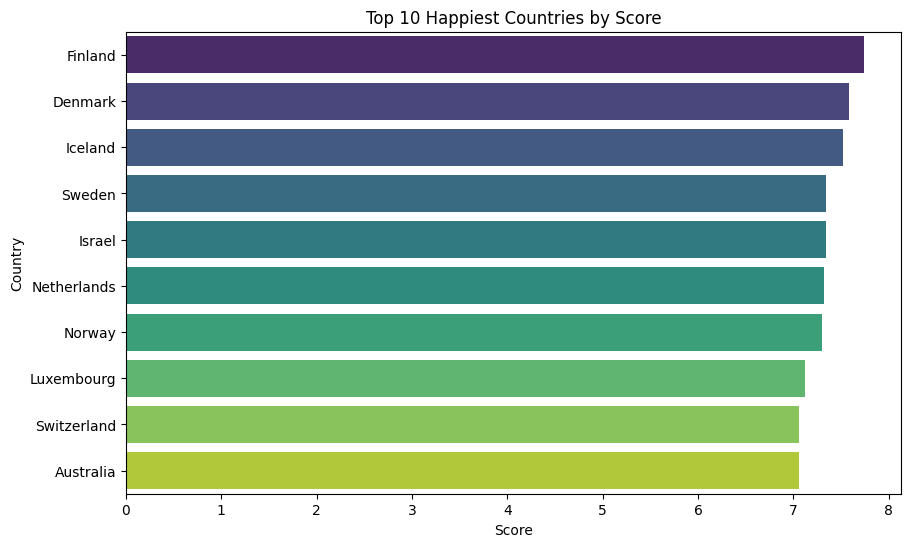

In [9]:
# Data Visualizations
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()


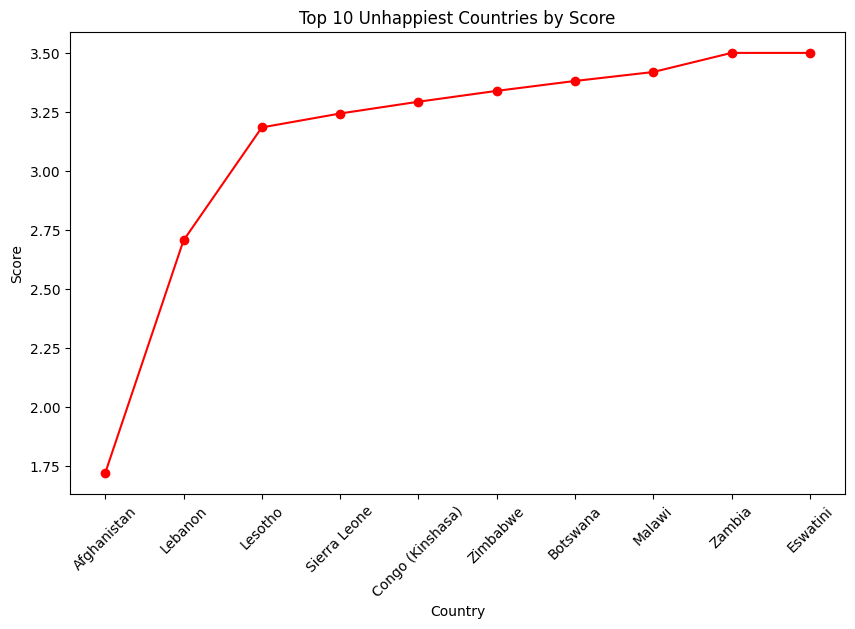

In [10]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

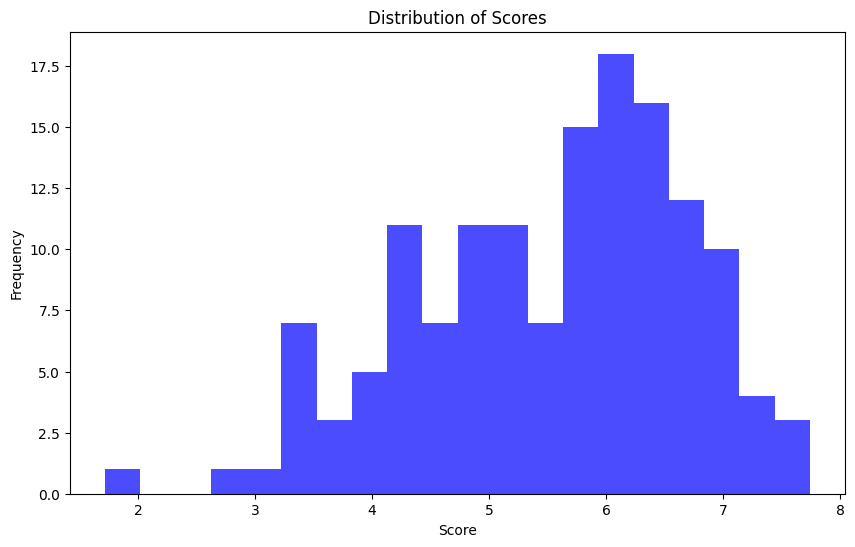

In [11]:
# Histogram: Plot a histogram for the Score column to show its distribution.
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

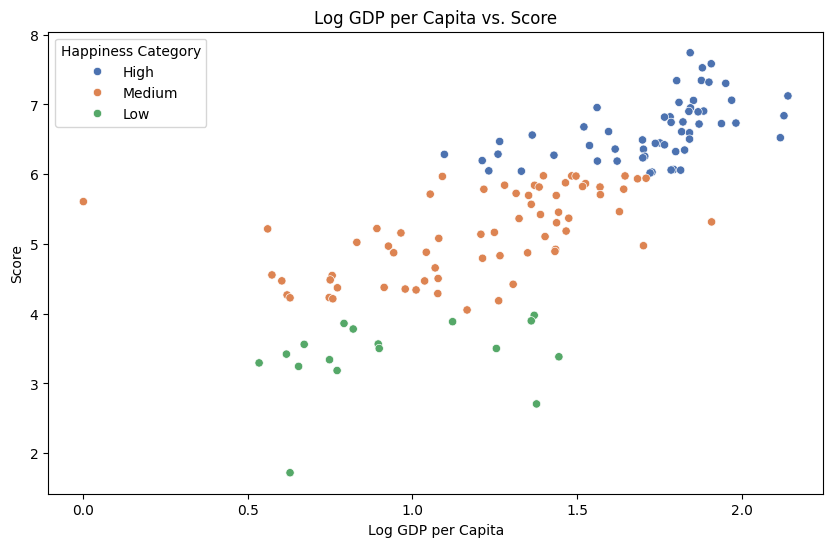

In [12]:
# Scatter Plot: Plot a scatter plot between Log GDP per capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score', hue='Happiness Category', palette='deep')
plt.title('Log GDP per Capita vs. Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend(title='Happiness Category')
plt.show()

# **Task - 2: Composite Score Ranking**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task - 1 - Setup Task - Preparing the South-Asia Dataset
# Define the countries in South Asia
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
data_south_asia = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataframe as a separate CSV file
data_south_asia.to_csv('south_asia_happiness.csv', index=False)
print("South Asia dataset saved.")


South Asia dataset saved.


<ipython-input-14-73bcf8eab493>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_south_asia['Composite Score'] = (
<ipython-input-14-73bcf8eab493>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_south_asia.head(5), x='Composite Score', y='Country name', palette='coolwarm')


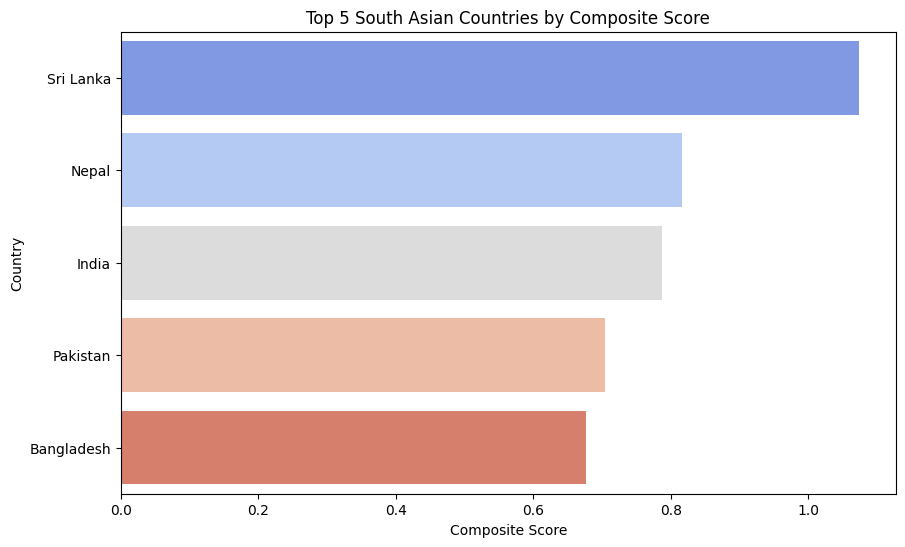

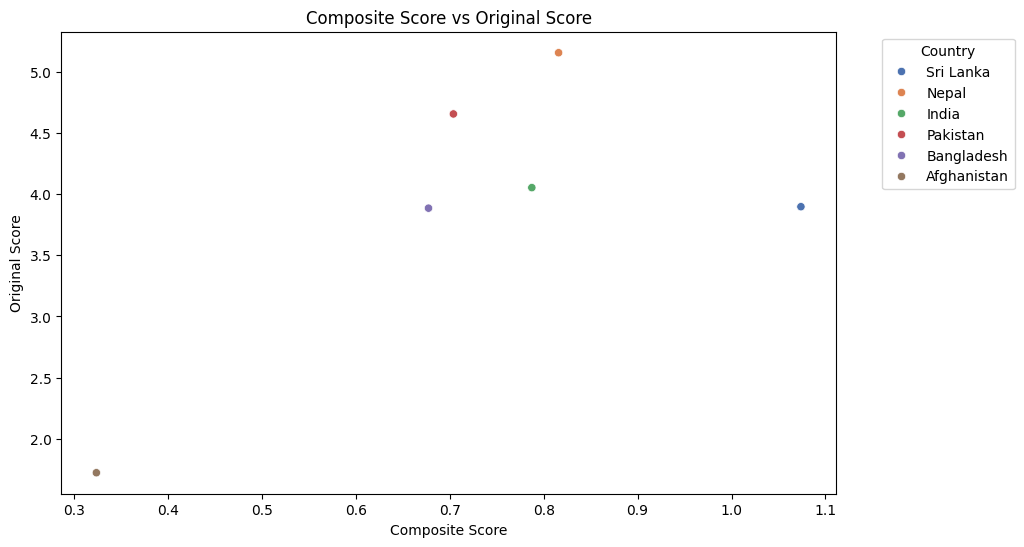

In [14]:
# Task - 2 - Composite Score Ranking
# Create a new column for Composite Score
weights = {'Log GDP per capita': 0.40, 'Social support': 0.30, 'Healthy life expectancy': 0.30}
data_south_asia['Composite Score'] = (
    weights['Log GDP per capita'] * data_south_asia['Log GDP per capita'] +
    weights['Social support'] * data_south_asia['Social support'] +
    weights['Healthy life expectancy'] * data_south_asia['Healthy life expectancy']
)

# Rank the countries by Composite Score
data_south_asia = data_south_asia.sort_values(by='Composite Score', ascending=False)

# Visualize the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(data=data_south_asia.head(5), x='Composite Score', y='Country name', palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# Compare rankings with the original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_south_asia, x='Composite Score', y='score', hue='Country name', palette='deep')
plt.title('Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-15-47a4a8db9222>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_south_asia, x='Log GDP per capita', y='score', palette='deep')


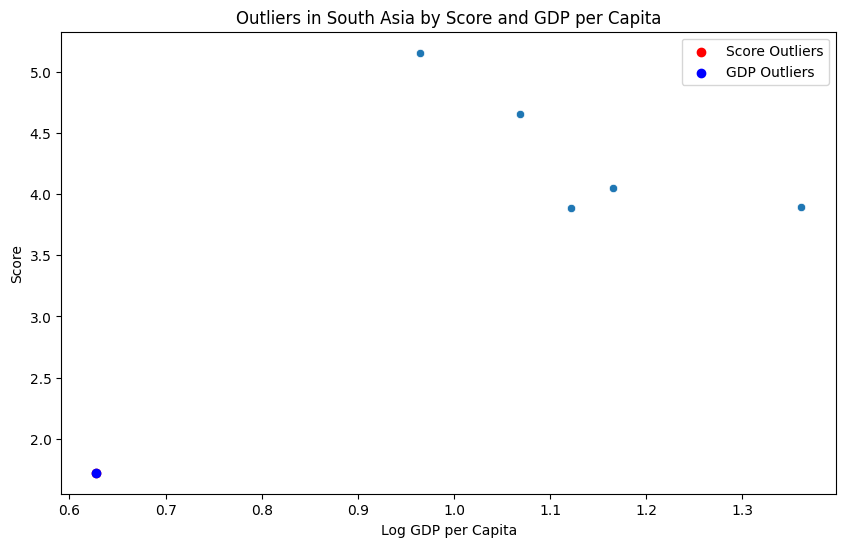

In [15]:
# Task - 3 - Outlier Detection
# Identify outliers based on Score and GDP per Capita
q1 = data_south_asia['score'].quantile(0.25)
q3 = data_south_asia['score'].quantile(0.75)
iqr = q3 - q1
score_outliers = data_south_asia[(data_south_asia['score'] < (q1 - 1.5 * iqr)) |
                                  (data_south_asia['score'] > (q3 + 1.5 * iqr))]

q1_gdp = data_south_asia['Log GDP per capita'].quantile(0.25)
q3_gdp = data_south_asia['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp
gdp_outliers = data_south_asia[(data_south_asia['Log GDP per capita'] < (q1_gdp - 1.5 * iqr_gdp)) |
                                (data_south_asia['Log GDP per capita'] > (q3_gdp + 1.5 * iqr_gdp))]

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_south_asia, x='Log GDP per capita', y='score', palette='deep')
plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='blue', label='GDP Outliers')
plt.title('Outliers in South Asia by Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

Correlation of Freedom with Score: 0.8005185224163315
Correlation of Generosity with Score: 0.874512371253192


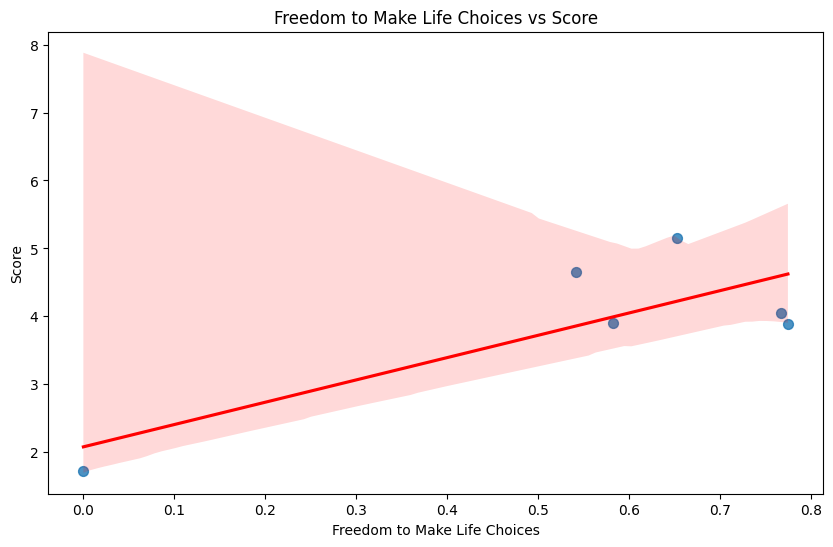

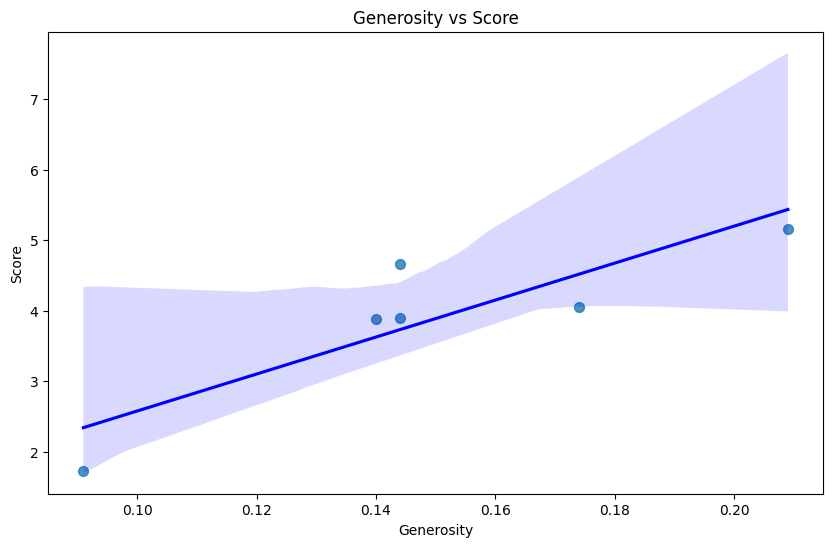

In [16]:

# Task - 4 - Exploring Trends Across Metrics
# Calculate correlations
freedom_corr = data_south_asia['Freedom to make life choices'].corr(data_south_asia['score'])
generosity_corr = data_south_asia['Generosity'].corr(data_south_asia['score'])
print(f"Correlation of Freedom with Score: {freedom_corr}")
print(f"Correlation of Generosity with Score: {generosity_corr}")

# Scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=data_south_asia, x='Freedom to make life choices', y='score', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=data_south_asia, x='Generosity', y='score', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

<ipython-input-17-375df6156cd0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=descending_gap.head(3), x='GDP-Score Gap', y='Country name', palette='Blues')


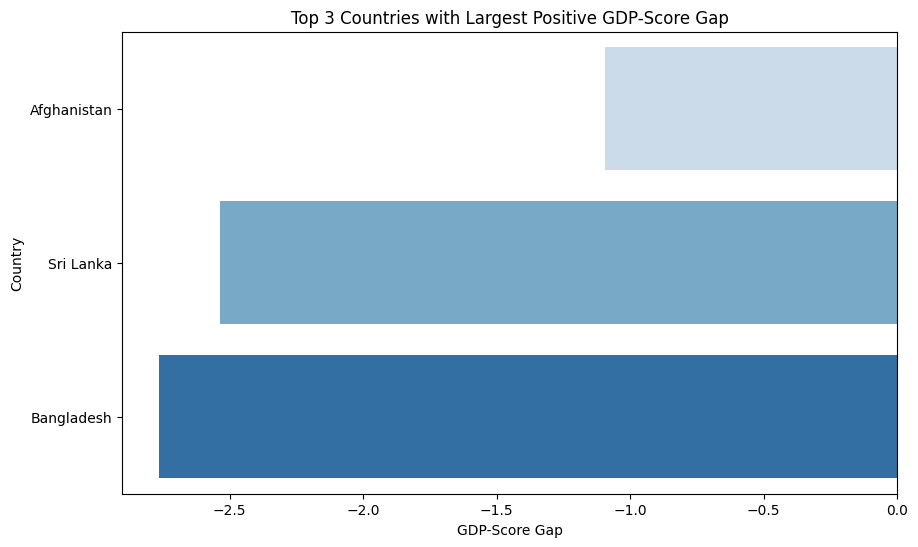

<ipython-input-17-375df6156cd0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ascending_gap.head(3), x='GDP-Score Gap', y='Country name', palette='Reds')


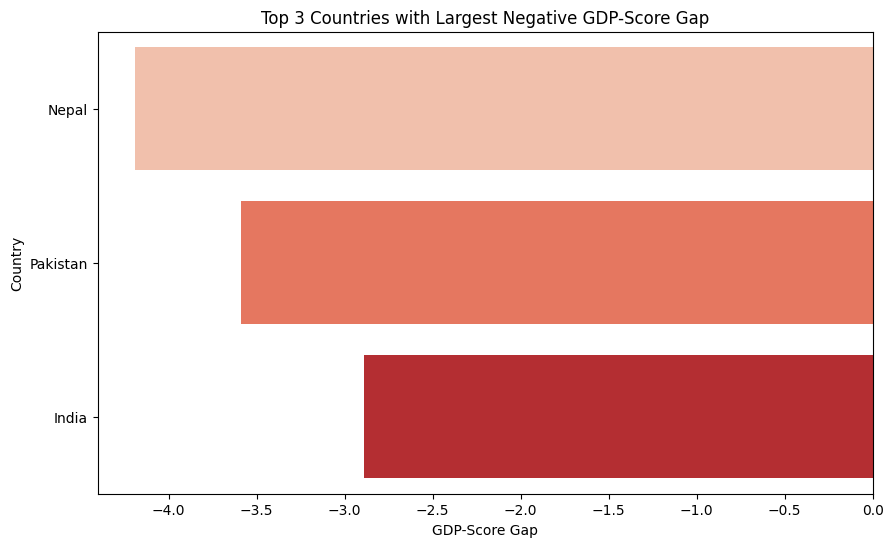

Analysis of GDP-Score Gap:
Countries with a high positive gap may indicate economic prosperity not translating to overall happiness.
Countries with a high negative gap may face socio-economic challenges despite economic indicators.


In [17]:

# Task - 5 - Gap Analysis
# Add GDP-Score Gap column
data_south_asia['GDP-Score Gap'] = data_south_asia['Log GDP per capita'] - data_south_asia['score']

# Rank countries by the gap
ascending_gap = data_south_asia.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = data_south_asia.sort_values(by='GDP-Score Gap', ascending=False)

# Visualize top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(data=descending_gap.head(3), x='GDP-Score Gap', y='Country name', palette='Blues')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=ascending_gap.head(3), x='GDP-Score Gap', y='Country name', palette='Reds')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

# Discuss implications of gaps
print("Analysis of GDP-Score Gap:")
print("Countries with a high positive gap may indicate economic prosperity not translating to overall happiness.")
print("Countries with a high negative gap may face socio-economic challenges despite economic indicators.")

# **Problem - 3: Comparative Analysis**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset
# Define the countries in the Middle East
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
data_middle_east = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered dataframe as a separate CSV file
data_middle_east.to_csv('middle_east_happiness.csv', index=False)
print("Middle East dataset saved.")

Middle East dataset saved.


In [19]:
# Descriptive Statistics for South Asia and Middle East
south_asia_mean = data_south_asia['score'].mean()
middle_east_mean = data_middle_east['score'].mean()
south_asia_std = data_south_asia['score'].std()
middle_east_std = data_middle_east['score'].std()

print(f"South Asia Mean Happiness Score: {south_asia_mean}")
print(f"Middle East Mean Happiness Score: {middle_east_mean}")
print(f"South Asia Standard Deviation: {south_asia_std}")
print(f"Middle East Standard Deviation: {middle_east_std}")

# Which region has higher happiness scores on average
higher_mean_region = "South Asia" if south_asia_mean > middle_east_mean else "Middle East"
print(f"The region with higher happiness scores on average is: {higher_mean_region}")

South Asia Mean Happiness Score: 3.895666666666667
Middle East Mean Happiness Score: 5.412100000000001
South Asia Standard Deviation: 1.1770690152521501
Middle East Standard Deviation: 1.5662011684327144
The region with higher happiness scores on average is: Middle East


<ipython-input-20-5d10c63201d1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=south_asia_top3, x='score', y='Country name', palette='Greens')


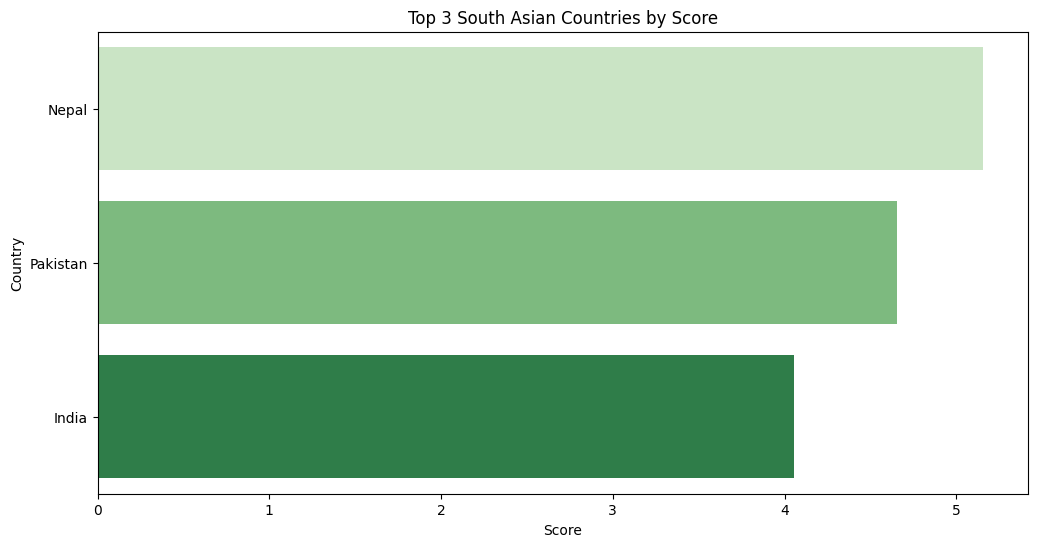

<ipython-input-20-5d10c63201d1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=south_asia_bottom3, x='score', y='Country name', palette='Greens')


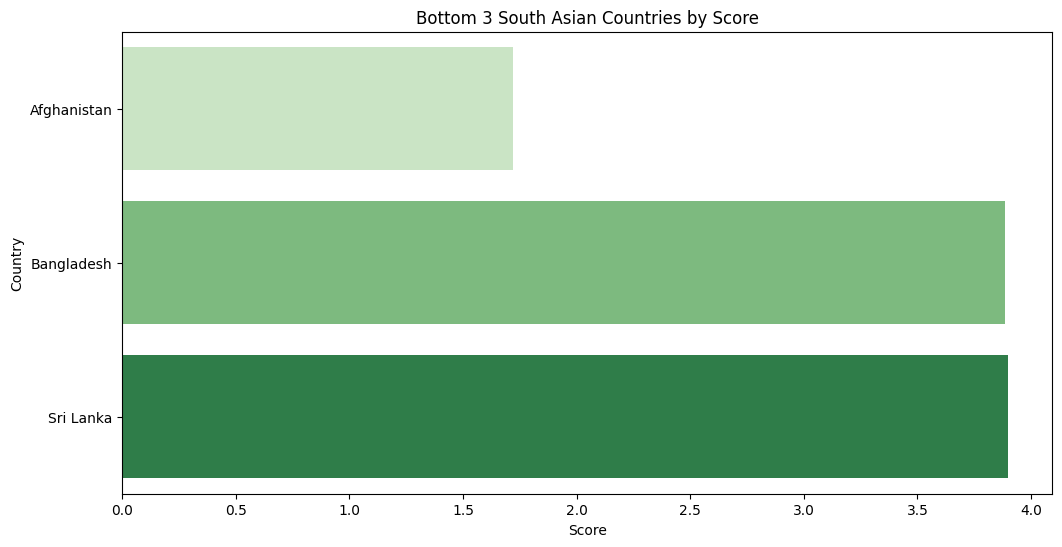

<ipython-input-20-5d10c63201d1>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=middle_east_top3, x='score', y='Country name', palette='Blues')


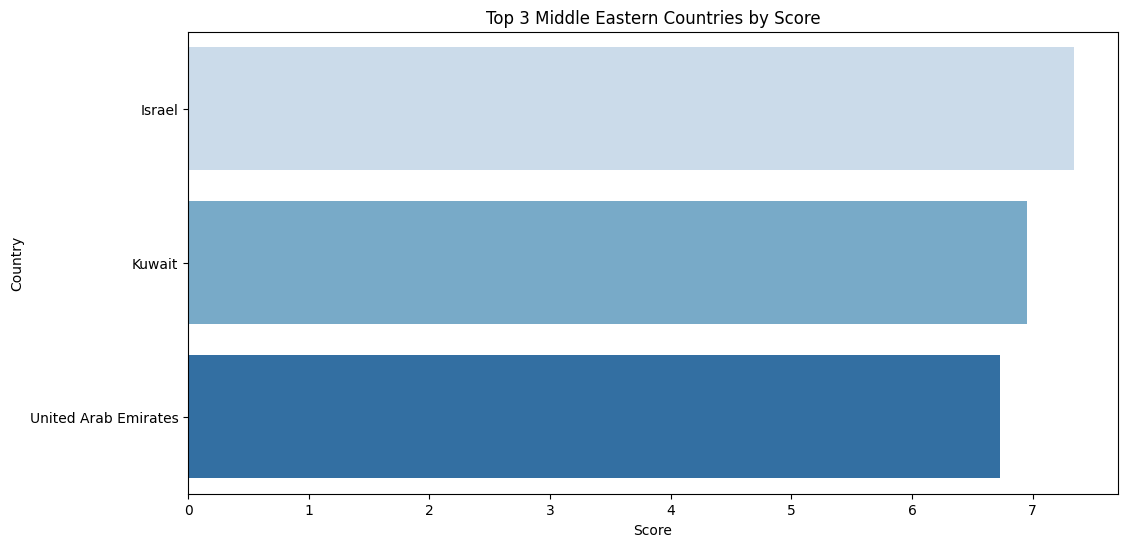

<ipython-input-20-5d10c63201d1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=middle_east_bottom3, x='score', y='Country name', palette='Blues')


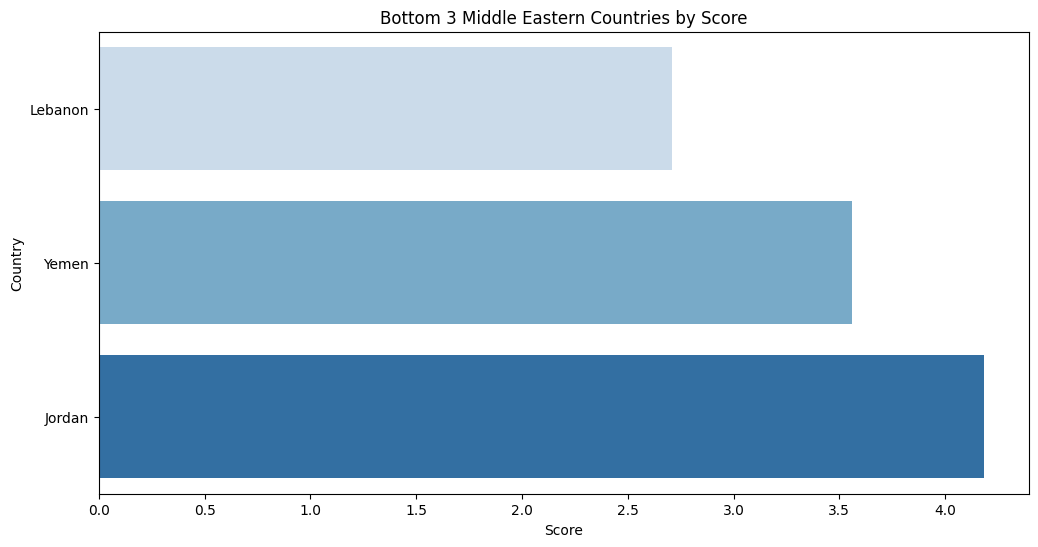

In [20]:
# Top and Bottom Performers
south_asia_top3 = data_south_asia.nlargest(3, 'score')
south_asia_bottom3 = data_south_asia.nsmallest(3, 'score')
middle_east_top3 = data_middle_east.nlargest(3, 'score')
middle_east_bottom3 = data_middle_east.nsmallest(3, 'score')

# Plot bar charts for top and bottom performers
plt.figure(figsize=(12, 6))
sns.barplot(data=south_asia_top3, x='score', y='Country name', palette='Greens')
plt.title('Top 3 South Asian Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(data=south_asia_bottom3, x='score', y='Country name', palette='Greens')
plt.title('Bottom 3 South Asian Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=middle_east_top3, x='score', y='Country name', palette='Blues')
plt.title('Top 3 Middle Eastern Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=middle_east_bottom3, x='score', y='Country name', palette='Blues')
plt.title('Bottom 3 Middle Eastern Countries by Score')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

<ipython-input-21-230ffdc8a43a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_melted, x='variable', y='value', hue='Region', ci=None)


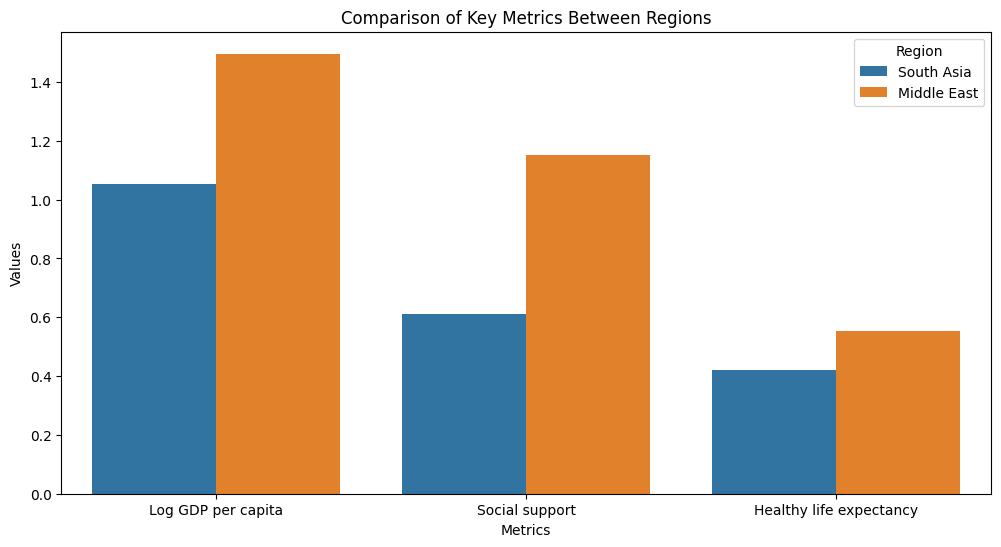

In [21]:
# Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
data_combined = pd.concat([
data_south_asia.assign(Region="South Asia"),
data_middle_east.assign(Region="Middle East")
])

plt.figure(figsize=(12, 6))
data_melted = data_combined.melt(id_vars=['Region'], value_vars=metrics)
sns.barplot(data=data_melted, x='variable', y='value', hue='Region', ci=None)
plt.title('Comparison of Key Metrics Between Regions')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend(title='Region')
plt.show()

In [22]:
# Happiness Disparity
south_asia_range = data_south_asia['score'].max() - data_south_asia['score'].min()
middle_east_range = data_middle_east['score'].max() - data_middle_east['score'].min()
south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"South Asia Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")
print(f"Middle East Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")

South Asia Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263
Middle East Range: 4.634, Coefficient of Variation: 0.28938880812119405


South Asia Correlations:
 Freedom to make life choices    0.800519
Generosity                      0.874512
score                           1.000000
Name: score, dtype: float64
Middle East Correlations:
 Freedom to make life choices    0.863220
Generosity                      0.627524
score                           1.000000
Name: score, dtype: float64


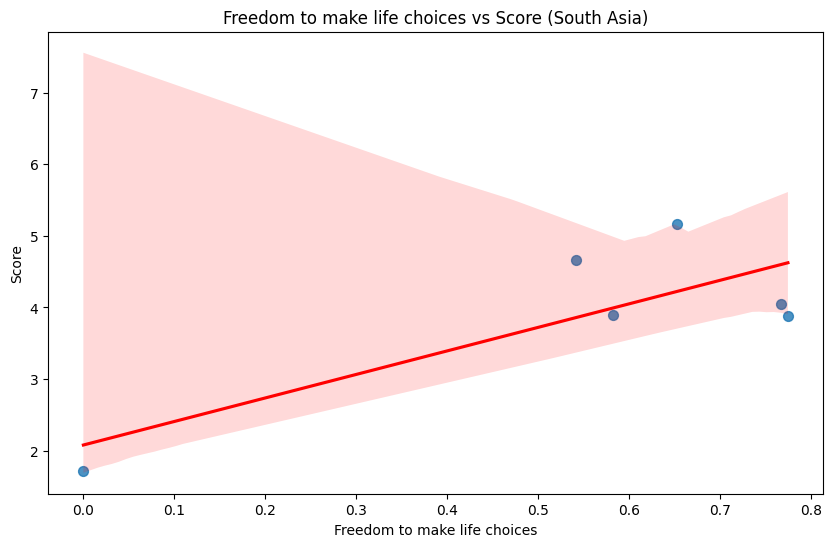

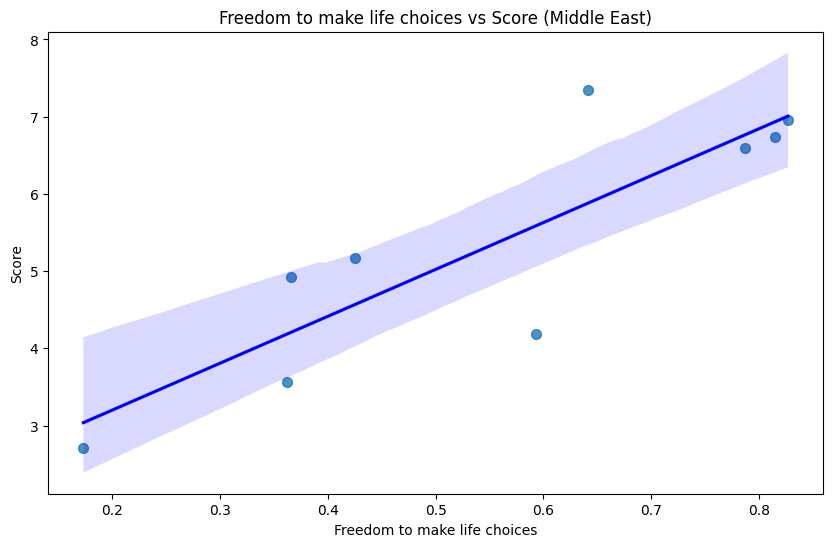

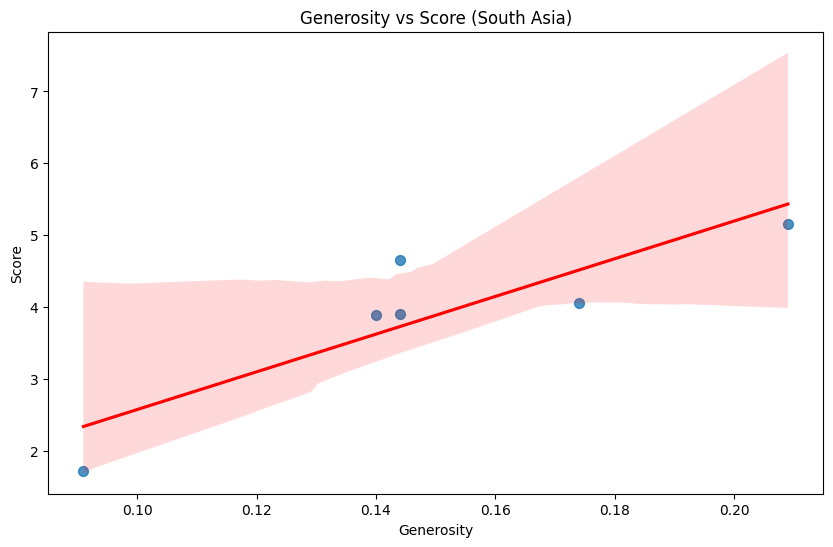

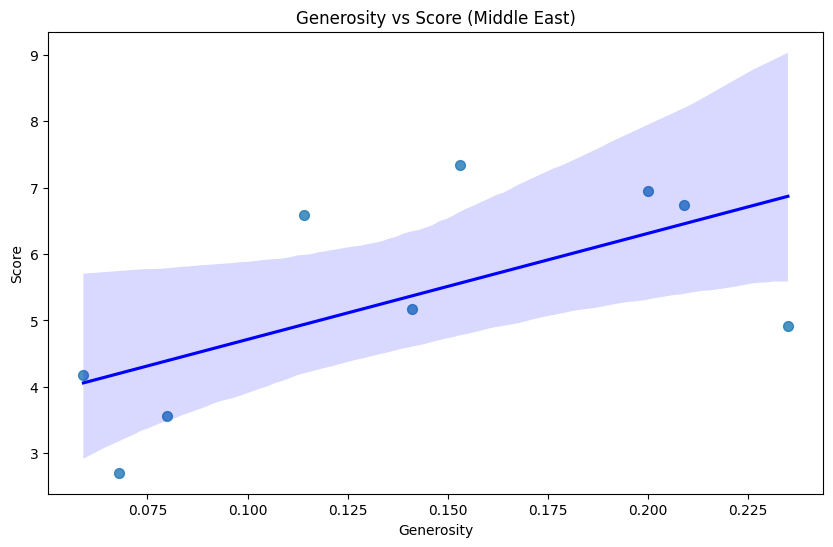

In [23]:
# Correlation Analysis
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']
correlations_sa = data_south_asia[metrics_to_correlate + ['score']].corr()['score']
correlations_me = data_middle_east[metrics_to_correlate + ['score']].corr()['score']

print("South Asia Correlations:\n", correlations_sa)
print("Middle East Correlations:\n", correlations_me)
# Scatter plots with trendlines
for metric in metrics_to_correlate:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=data_south_asia, x=metric, y='score', scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'{metric} vs Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.regplot(data=data_middle_east, x=metric, y='score', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
    plt.title(f'{metric} vs Score (Middle East)')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

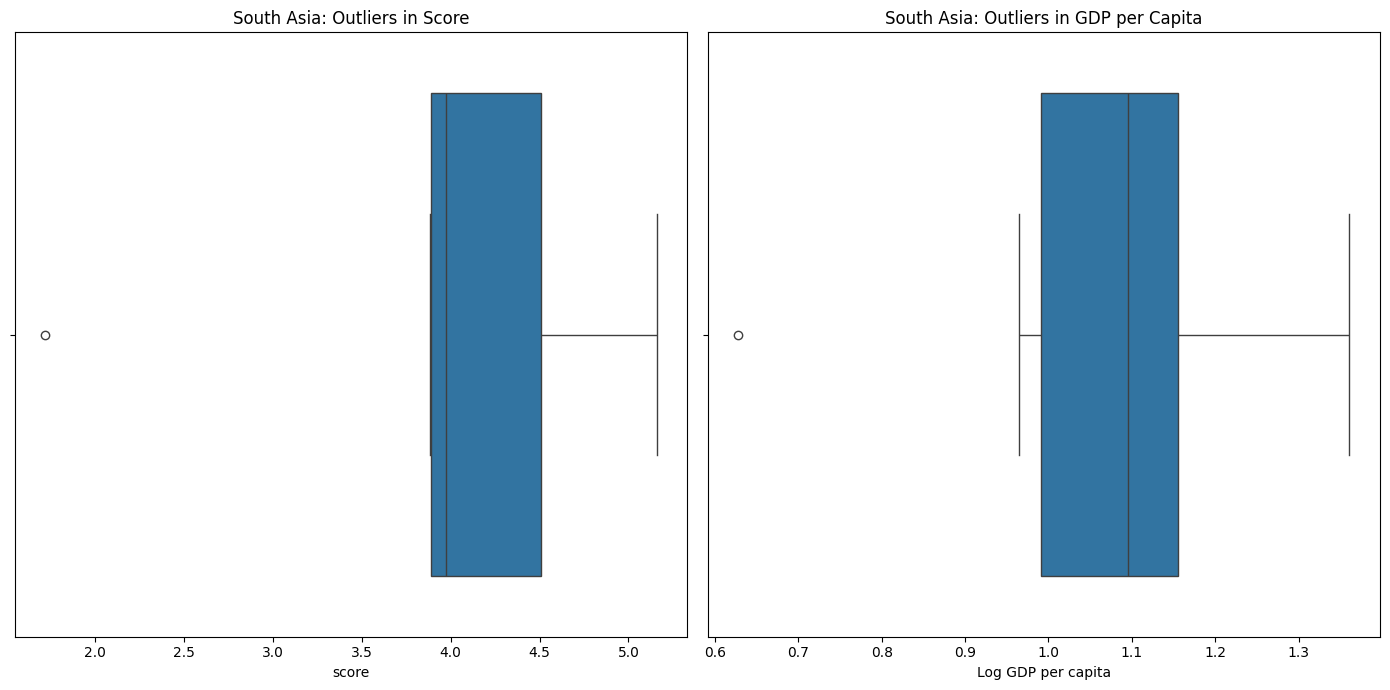

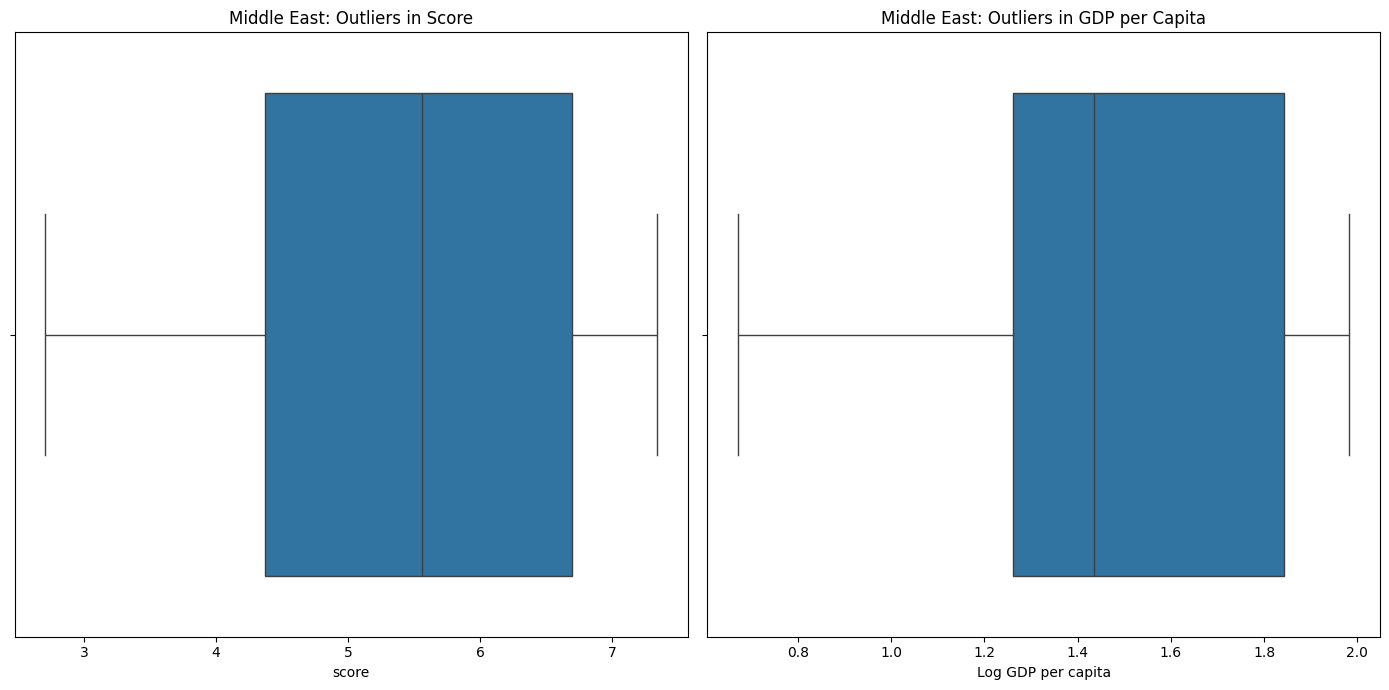

In [37]:
# Outlier Detection
for region, dataset in zip(["South Asia", "Middle East"], [data_south_asia, data_middle_east]):
    # Outlier Detection for Score
    q1_score = dataset['score'].quantile(0.25)
    q3_score = dataset['score'].quantile(0.75)
    iqr_score = q3_score - q1_score
    score_outliers = dataset[(dataset['score'] < (q1_score - 1.5 * iqr_score)) |
                             (dataset['score'] > (q3_score + 1.5 * iqr_score))]

    # Outlier Detection for GDP
    q1_gdp = dataset['Log GDP per capita'].quantile(0.25)
    q3_gdp = dataset['Log GDP per capita'].quantile(0.75)
    iqr_gdp = q3_gdp - q1_gdp
    gdp_outliers = dataset[(dataset['Log GDP per capita'] < (q1_gdp - 1.5 * iqr_gdp)) |
                           (dataset['Log GDP per capita'] > (q3_gdp + 1.5 * iqr_gdp))]
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataset['score'])
    plt.title(f'{region}: Outliers in Score')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset['Log GDP per capita'])
    plt.title(f'{region}: Outliers in GDP per Capita')
    plt.tight_layout()
    plt.show()


<ipython-input-25-f1028252adc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_combined, x='Region', y='score', palette='Set2')


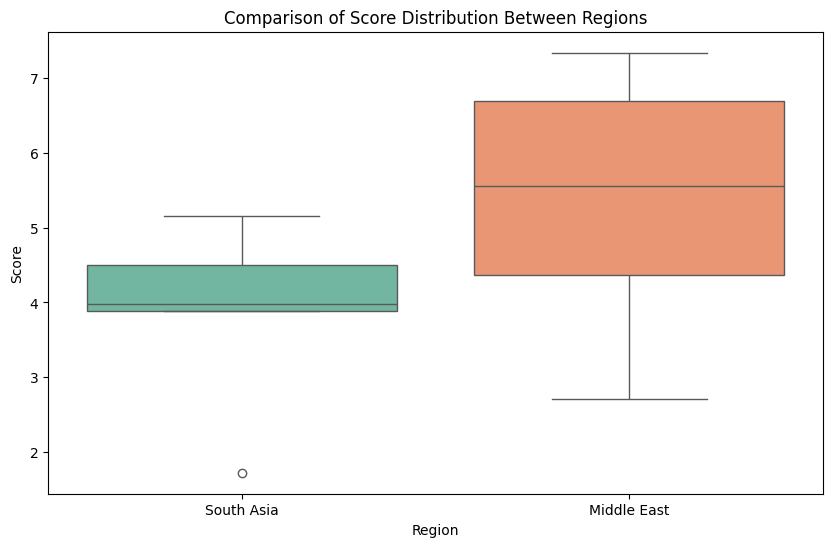

In [25]:
# Visualization of score distribution using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_combined, x='Region', y='score', palette='Set2')
plt.title('Comparison of Score Distribution Between Regions')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
